<a href="https://colab.research.google.com/github/SethSekyere/SethMLClass/blob/main/Copy_of_ML_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning for Engineering
##Homework 4
##Seth Sekyere
##RIN:662055184


##Problem 1

170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_78 (Dense)            (None, 512)               1573376   
                                                                 
 dense_79 (Dense)            (None, 256)               131328    
                                                                 
 dense_80 (Dense)            (None, 128)               32896     
                                                                 
 dense_81 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
______________

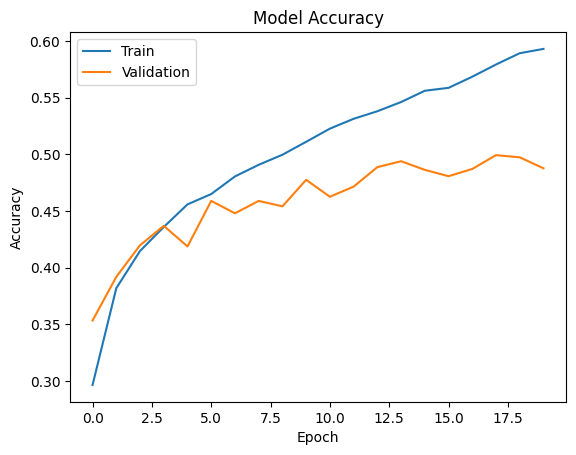

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Here, we are trying to load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Converting labels to  vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN model, Define fully connected neural network model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Printing the model summary
model.summary()

# Training the model with the 70%-30% split for training and validation data
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.3)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#(a.)
Visualizing the data by plotting an image from each category from the
CIFAR-10 dataset

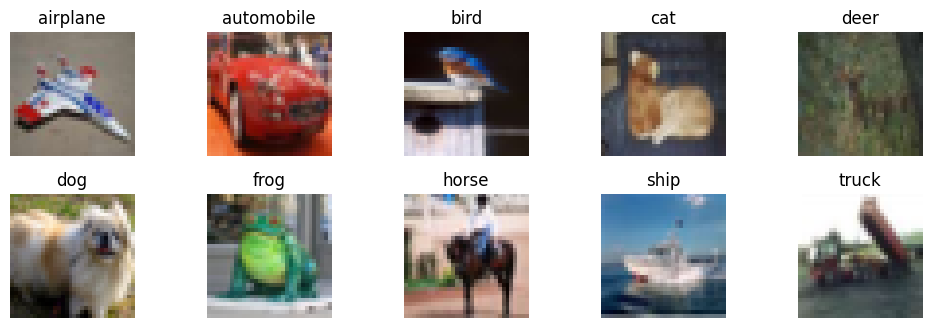

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Loading CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

#The CIFAR-10 class labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting an image from each category
plt.figure(figsize=(10, 5))
for i in range(10):
    # Otaining the second image in the dataset with the current category
    index = np.where(y_train[:, 0] == i)[0][1]
    image = x_train[index]

    # Plot the image
    plt.subplot(3, 5, i+1)
    plt.imshow(image)
    plt.title(cifar10_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


#(b.)


In [ ]:
pip install scikit-learn tensorflow


In [ ]:
pip install scikeras


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example data
x_train_full, y_train_full = make_classification(n_samples=1000, n_features=32, n_classes=3, n_clusters_per_class=1, random_state=42)
x_test, y_test = make_classification(n_samples=500, n_features=32, n_classes=3, n_clusters_per_class=1, random_state=42)

# Splitting the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=42)

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(32,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Number of classes is 3

    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam()
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD()

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'optimizer': ['adam', 'sgd'],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(x_train, y_train, validation_data=(x_val, y_val))

print("Grid Search Best Parameters:", grid_result.best_params_)
print("Grid Search Best Score:", grid_result.best_score_)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Grid Search Best Parameters: {'batch_size': 16, 'epochs': 20, 'optimizer': 'sgd'}
Grid Search Best Score: 0.8342870767763472


#We can see that the best parameter are a batch size of 16, epochs of 20 and optimizer of Stochastic Gradient Descent

#(c.)
Using  batch size of 16, epochs of 20 and optimizer of Stochastic Gradient Descent

Epoch 1/20
44/44 [==============================] - 1s 13ms/step - loss: 1.0813 - accuracy: 0.3786 - val_loss: 0.9650 - val_accuracy: 0.5033
Epoch 2/20
44/44 [==============================] - 0s 5ms/step - loss: 0.8733 - accuracy: 0.6043 - val_loss: 0.8262 - val_accuracy: 0.6300
Epoch 3/20
44/44 [==============================] - 0s 4ms/step - loss: 0.7704 - accuracy: 0.6857 - val_loss: 0.7407 - val_accuracy: 0.6867
Epoch 4/20
44/44 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.7429 - val_loss: 0.6816 - val_accuracy: 0.7333
Epoch 5/20
44/44 [==============================] - 0s 4ms/step - loss: 0.6471 - accuracy: 0.7629 - val_loss: 0.6395 - val_accuracy: 0.7433
Epoch 6/20
44/44 [==============================] - 0s 4ms/step - loss: 0.6033 - accuracy: 0.7829 - val_loss: 0.6074 - val_accuracy: 0.7533
Epoch 7/20
44/44 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.8057 - val_loss: 0.5811 - val_accuracy: 0.7633
Epoch 8/20
44/44 [=

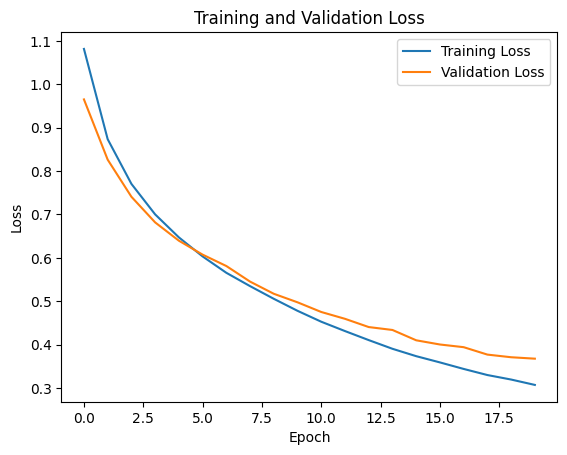

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example data
x_train_full, y_train_full = make_classification(n_samples=1000, n_features=32, n_classes=3, n_clusters_per_class=1, random_state=42)
x_test, y_test = make_classification(n_samples=500, n_features=32, n_classes=3, n_clusters_per_class=1, random_state=42)

# encoding for labels
y_train_full = tf.keras.utils.to_categorical(y_train_full)
y_test = tf.keras.utils.to_categorical(y_test)

# Splitting the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=42)

# Build the model with best parameters
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(32,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
optimizer = tf.keras.optimizers.SGD()  # Since 'sgd' was the best optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the best parameters
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

# Plot training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#(d.)


Epoch 1/20
44/44 [==============================] - 1s 8ms/step - loss: 1.0862 - accuracy: 0.4000 - val_loss: 1.0052 - val_accuracy: 0.5033
Epoch 2/20
44/44 [==============================] - 0s 3ms/step - loss: 0.9309 - accuracy: 0.5857 - val_loss: 0.8817 - val_accuracy: 0.6600
Epoch 3/20
44/44 [==============================] - 0s 3ms/step - loss: 0.8249 - accuracy: 0.6929 - val_loss: 0.7895 - val_accuracy: 0.7233
Epoch 4/20
44/44 [==============================] - 0s 4ms/step - loss: 0.7431 - accuracy: 0.7414 - val_loss: 0.7201 - val_accuracy: 0.7567
Epoch 5/20
44/44 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.7629 - val_loss: 0.6652 - val_accuracy: 0.7767
Epoch 6/20
44/44 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.7857 - val_loss: 0.6239 - val_accuracy: 0.7933
Epoch 7/20
44/44 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.8014 - val_loss: 0.5776 - val_accuracy: 0.8000
Epoch 8/20
44/44 [==

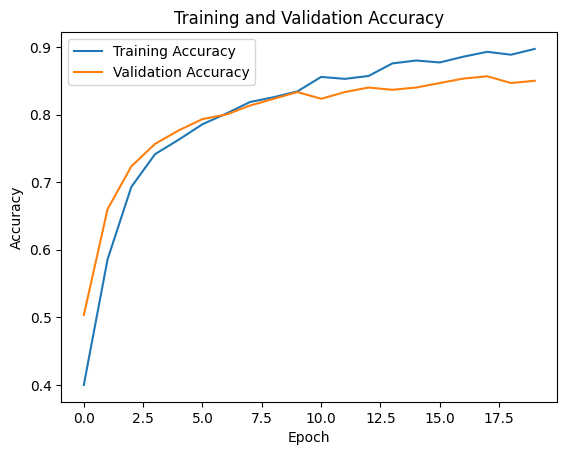

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example data
x_train_full, y_train_full = make_classification(n_samples=1000, n_features=32, n_classes=3, n_clusters_per_class=1, random_state=42)
x_test, y_test = make_classification(n_samples=500, n_features=32, n_classes=3, n_clusters_per_class=1, random_state=42)

# One-hot encoding for labels
y_train_full = tf.keras.utils.to_categorical(y_train_full)
y_test = tf.keras.utils.to_categorical(y_test)

# Splitting the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=42)

# Build the model with best parameters
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(32,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
optimizer = tf.keras.optimizers.SGD()  # Since 'sgd' was the best optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the best parameters(batch size 16 and epochs of 20)
history = model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))

# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Problem 2


In [ ]:
pip install pandas scikit-learn


In [ ]:
import pandas as pd
import requests
from io import StringIO

# the website to download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'

# Downloading the dataset
response = requests.get(url)

# Checking whether the download was successful
if response.status_code == 200:
    # Loading the data into a Pandas DataFrame
    df = pd.read_csv(StringIO(response.text), sep='\t', header=None)

    # Now we add the column names
    df.columns = ['Frequency(Hz)', 'Angle_of_Attack(deg)', 'Chord_Length(m)', 'Free_stream_velocity(m/s)', 'Suction_side_displacement_thickness(m)', 'Scaled_sound_pressure_level(dB)']

    # Display the first few rows of the dataset
    print(df.head())
else:
    print("Failed to download the dataset.")


   Frequency(Hz)  Angle_of_Attack(deg)  Chord_Length(m)  \
0            800                   0.0           0.3048   
1           1000                   0.0           0.3048   
2           1250                   0.0           0.3048   
3           1600                   0.0           0.3048   
4           2000                   0.0           0.3048   

   Free_stream_velocity(m/s)  Suction_side_displacement_thickness(m)  \
0                       71.3                                0.002663   
1                       71.3                                0.002663   
2                       71.3                                0.002663   
3                       71.3                                0.002663   
4                       71.3                                0.002663   

   Scaled_sound_pressure_level(dB)  
0                          126.201  
1                          125.201  
2                          125.951  
3                          127.591  
4                          

#(a.)
Visualizing the data

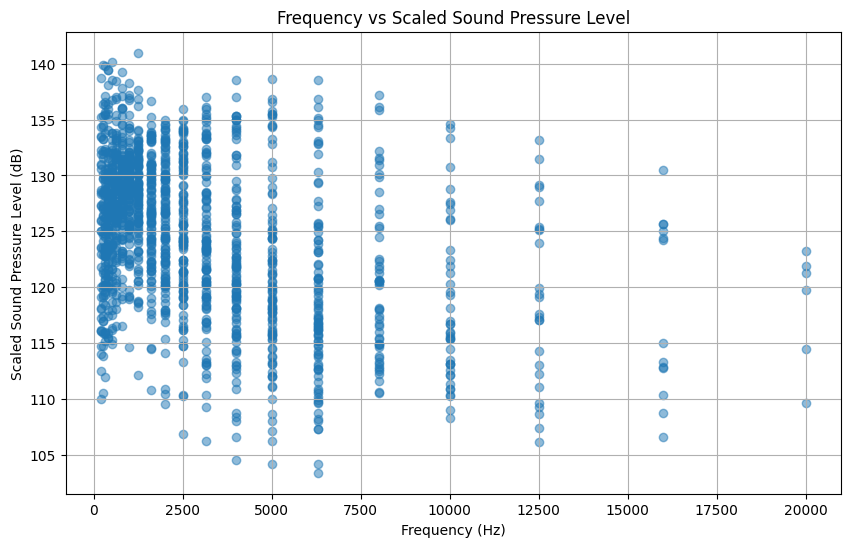

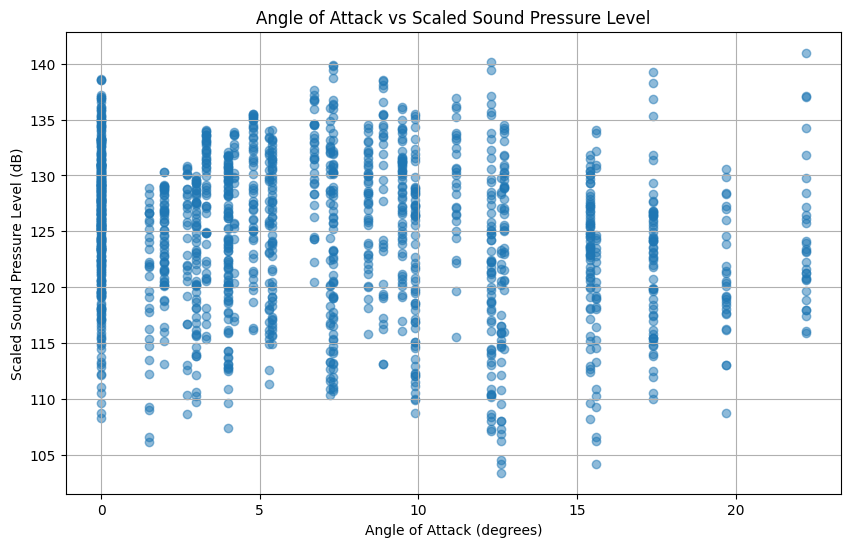

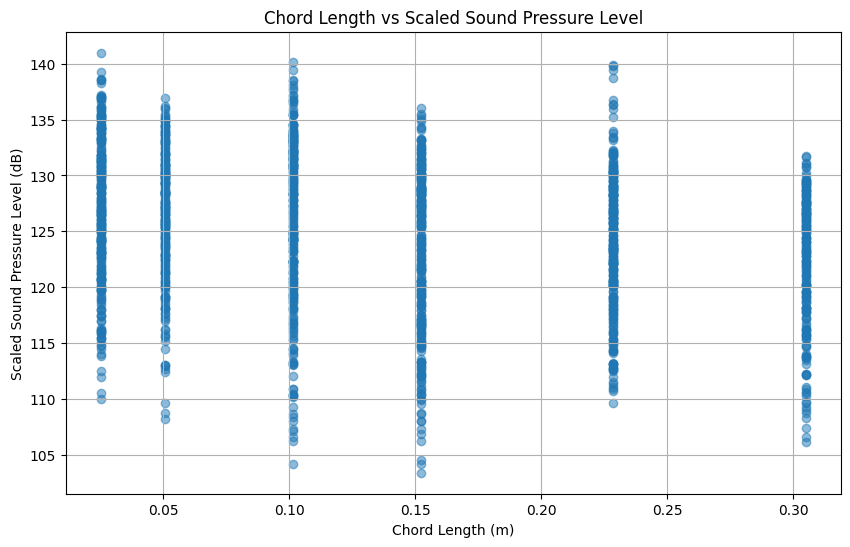

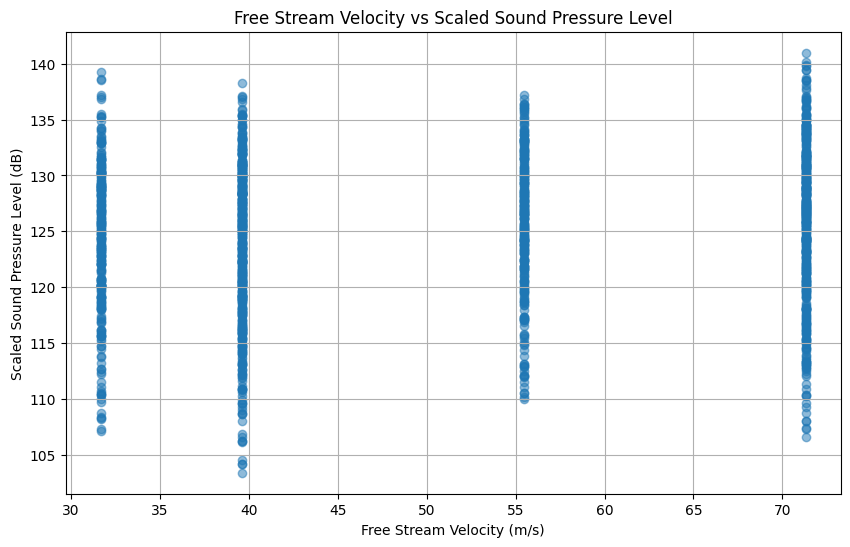

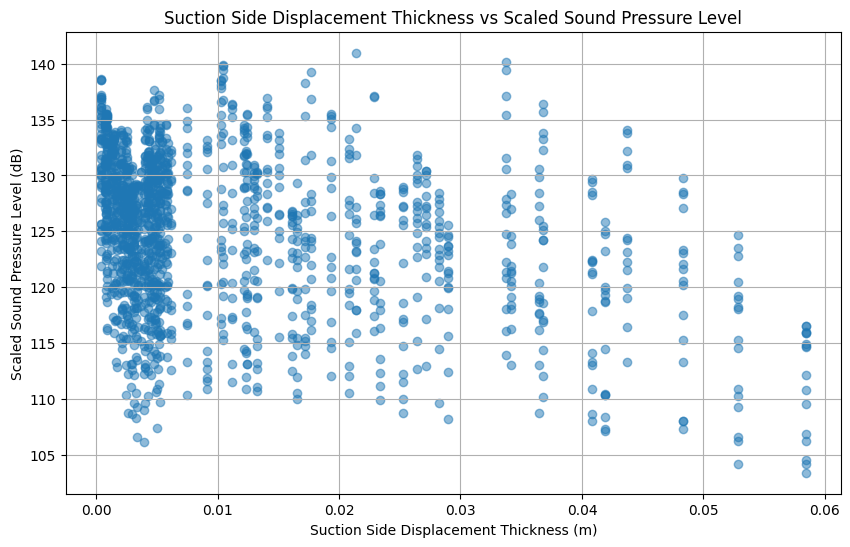

In [ ]:
import matplotlib.pyplot as plt

# Plotting Frequency vs Scaled_sound_pressure_level
plt.figure(figsize=(10, 6))
plt.scatter(df['Frequency(Hz)'], df['Scaled_sound_pressure_level(dB)'], alpha=0.5)
plt.title('Frequency vs Scaled Sound Pressure Level')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.grid(True)
plt.show()

# Plotting Angle_of_Attack vs Scaled_sound_pressure_level
plt.figure(figsize=(10, 6))
plt.scatter(df['Angle_of_Attack(deg)'], df['Scaled_sound_pressure_level(dB)'], alpha=0.5)
plt.title('Angle of Attack vs Scaled Sound Pressure Level')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.grid(True)
plt.show()

# Plotting Chord_Length vs Scaled_sound_pressure_level
plt.figure(figsize=(10, 6))
plt.scatter(df['Chord_Length(m)'], df['Scaled_sound_pressure_level(dB)'], alpha=0.5)
plt.title('Chord Length vs Scaled Sound Pressure Level')
plt.xlabel('Chord Length (m)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.grid(True)
plt.show()

# Plotting Free_stream_velocity vs Scaled_sound_pressure_level
plt.figure(figsize=(10, 6))
plt.scatter(df['Free_stream_velocity(m/s)'], df['Scaled_sound_pressure_level(dB)'], alpha=0.5)
plt.title('Free Stream Velocity vs Scaled Sound Pressure Level')
plt.xlabel('Free Stream Velocity (m/s)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.grid(True)
plt.show()

# Plotting Suction_side_displacement_thickness vs Scaled_sound_pressure_level
plt.figure(figsize=(10, 6))
plt.scatter(df['Suction_side_displacement_thickness(m)'], df['Scaled_sound_pressure_level(dB)'], alpha=0.5)
plt.title('Suction Side Displacement Thickness vs Scaled Sound Pressure Level')
plt.xlabel('Suction Side Displacement Thickness (m)')
plt.ylabel('Scaled Sound Pressure Level (dB)')
plt.grid(True)
plt.show()


#(b.)

Epoch 1/100
27/27 [==============================] - 2s 16ms/step - loss: 15270.1035 - val_loss: 14780.9717
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 13315.5898 - val_loss: 11141.4551
Epoch 3/100
27/27 [==============================] - 0s 7ms/step - loss: 7441.6938 - val_loss: 3412.2056
Epoch 4/100
27/27 [==============================] - 0s 11ms/step - loss: 1454.2465 - val_loss: 925.3629
Epoch 5/100
27/27 [==============================] - 0s 14ms/step - loss: 607.3244 - val_loss: 525.9210
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 424.0799 - val_loss: 439.0838
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 371.2889 - val_loss: 388.6768
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 330.9759 - val_loss: 358.6658
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 300.9302 - val_loss: 329.0573
Epoch 10/100
27/27 [==============================] - 0s 3m

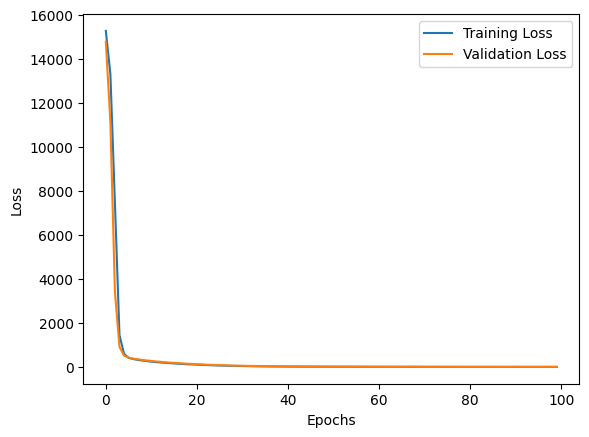

In [ ]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Downloading the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
response = requests.get(url)

# Checking whether the download was successful
if response.status_code == 200:
    # Loading the data into a Pandas DataFrame
    df = pd.read_csv(StringIO(response.text), sep='\t', header=None)

    # Adding column names
    df.columns = ['Frequency(Hz)', 'Angle_of_Attack(deg)', 'Chord_Length(m)',
                  'Free_stream_velocity(m/s)', 'Suction_side_displacement_thickness(m)',
                  'Scaled_sound_pressure_level(dB)']

    # Splitting the data into input features and target variable
    X = df.drop(columns=['Scaled_sound_pressure_level(dB)'])
    y = df['Scaled_sound_pressure_level(dB)']

    # Splitting the data into training and testing sets (70%-30% split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Standardizing the input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define a function to build the model
    def build_model():
        model = Sequential([
            Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)  # Output layer (1 neuron for the target variable)
        ])
        return model

    # Build the model
    model = build_model()

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training the model
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Predicting on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculating R-squared
    r_squared = r2_score(y_test, y_pred)
    print(f'Coefficient of Determination (R-squared): {r_squared}')

    # Plotting training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("Failed to download the dataset.")


#(c.)

In [ ]:
from sklearn.metrics import r2_score

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Calculating R-squared
r_squared = r2_score(y_test, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')


15/15 [==============================] - 0s 2ms/step
Coefficient of Determination (R-squared): 0.694513485157489


#From the code, the coefficient of determination is 0.694